In [9]:
import pandas as pd
import numpy as np
import zipfile
import warnings
warnings.filterwarnings('ignore')

In [11]:
with zipfile.ZipFile("hmnist_28_28_RGB.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:
path='hmnist_28_28_RGB.csv'

In [13]:
df=pd.read_csv(path)

In [14]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [15]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set,test_set=np.array_split(df,(fractions[:-1].cumsum()*len(df)).astype(int))

In [16]:
print(len(train_set))

8012


In [17]:
print(len(test_set))

2003


In [18]:
df.label.unique()

array([4, 0, 6, 1, 2, 5, 3])

In [19]:
classes={
    0:('akiec','actinic keratoses and intraepithelial carcinomae'),
    1:('bcc','basal cell carcinoma'),
    2:('bkl','benign keratosis-like lesions'),
    3:('df','dermamatofibroma'),
    4:('nv','melanocytic nevi'),
    5:('vasc','pyogenic granulomas and hemorrhago'),
    6:('mel','melanoma'),
}

In [20]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])
columns=list(x_train)

In [22]:
!pip install torch

   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 1.3/216.1 MB 9.6 MB/s eta 0:00:23
    --------------------------------------- 3.7/216.1 MB 11.5 MB/s eta 0:00:19
    --------------------------------------- 5.2/216.1 MB 9.4 MB/s eta 0:00:23
   - -------------------------------------- 8.7/216.1 MB 11.4 MB/s eta 0:00:19
   - -------------------------------------- 10.2/216.1 MB 10.8 MB/s eta 0:00:20
   -- ------------------------------------- 13.4/216.1 MB 11.5 MB/s eta 0:00:18
   --- ------------------------------------ 16.8/216.1 MB 12.2 MB/s eta 0:00:17
   --- ------------------------------------ 19.1/216.1 MB 12.3 MB/s eta 0:00:16
   ---- ----------------------------------- 22.5/216.1 MB 12.5 MB/s eta 0:00:16
   ---- ----------------------------------- 26.2/216.1 MB 13.1 MB/s eta 0:00:15
   ----- ---------------------------------- 30.4/216.1 MB 13.7 MB/s eta 0:00:14
   ------ --------------------------------- 34.3/216.1 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [24]:
!pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------------- -------------- 1.6/2.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 8.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   ---------------------------------------- 0/2 [torchvision]
   -------------------- ------------------- 1/2 [torchaudio]
   -------------------- ------------------- 1/2 [torchaudio]
   -------------------- ------------------- 1/2 [torchaudio]
  

In [27]:
import sys
!{sys.executable} -m pip install torch 


In [33]:
import sys
!{sys.executable} -m pip install torchvision torchaudio

In [35]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [30]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


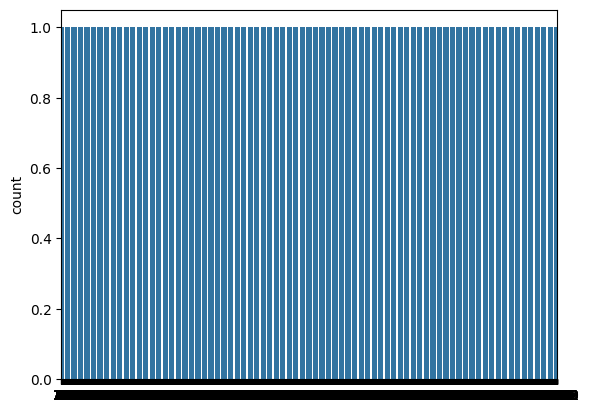

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt  # Needed to show the plot

sns.countplot(train_set['label'])
plt.show() 

In [41]:
!{sys.executable} -m pip install imblearn


   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   -------------------------- ------------- 2/3 [imblearn]
   ---------------------------------------- 3/3 [imblearn]



In [43]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

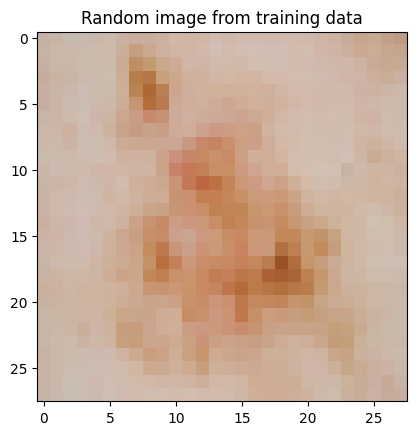

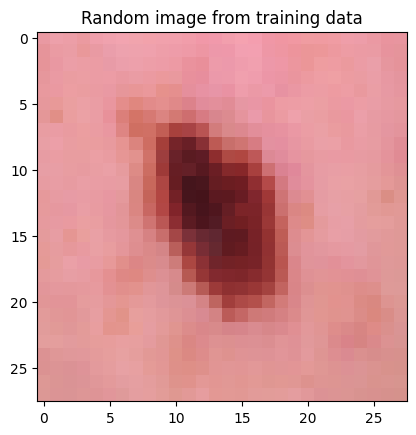

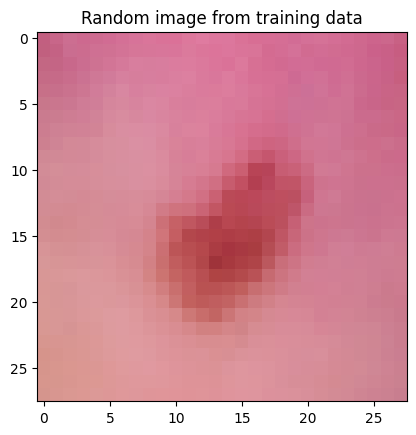

In [49]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [48]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 5, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │              

 Total params: 504,103 (1.92 MB)

 Trainable params: 502,983 (1.92 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [51]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [53]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4472 - loss: 1.5367

234/234 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.4478 - loss: 1.5350 - val_accuracy: 0.2403 - val_loss: 2.3033
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8323 - loss: 0.5071

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.8325 - loss: 0.5068 - val_accuracy: 0.3404 - val_loss: 1.5764
Epoch 3/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9064 - loss: 0.2739

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9065 - loss: 0.2738 - val_accuracy: 0.4617 - val_loss: 1.1324
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9323 - loss: 0.2006

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9323 - loss: 0.2006 - val_accuracy: 0.5114 - val_loss: 1.1095
Epoch 5/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9377 - loss: 0.1818

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9377 - loss: 0.1817 - val_accuracy: 0.4944 - val_loss: 1.2625
Epoch 6/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9474 - loss: 0.1514

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9475 - loss: 0.1513 - val_accuracy: 0.6301 - val_loss: 0.7963
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9553 - loss: 0.1262

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9553 - loss: 0.1263 - val_accuracy: 0.5970 - val_loss: 0.7679
Epoch 8/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9609 - loss: 0.1115

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9609 - loss: 0.1115 - val_accuracy: 0.5799 - val_loss: 1.0637
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9697 - loss: 0.0906

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9697 - loss: 0.0906 - val_accuracy: 0.7794 - val_loss: 0.5062
Epoch 10/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9736 - loss: 0.0763

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9736 - loss: 0.0764 - val_accuracy: 0.6105 - val_loss: 1.0097
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9663 - loss: 0.0974

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9663 - loss: 0.0973 - val_accuracy: 0.7436 - val_loss: 0.7269
Epoch 12/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9778 - loss: 0.0659

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9778 - loss: 0.0659 - val_accuracy: 0.7572 - val_loss: 0.5714
Epoch 13/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9760 - loss: 0.0693

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9760 - loss: 0.0693 - val_accuracy: 0.7253 - val_loss: 0.7500
Epoch 14/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9825 - loss: 0.0514

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9825 - loss: 0.0514 - val_accuracy: 0.7766 - val_loss: 0.5669
Epoch 15/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9831 - loss: 0.0480

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9830 - loss: 0.0481 - val_accuracy: 0.6957 - val_loss: 0.7170
Epoch 16/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9787 - loss: 0.0619

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9787 - loss: 0.0619 - val_accuracy: 0.7901 - val_loss: 0.5001
Epoch 17/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9867 - loss: 0.0434

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9867 - loss: 0.0434 - val_accuracy: 0.7709 - val_loss: 0.5403
Epoch 18/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9873 - loss: 0.0370

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9873 - loss: 0.0370 - val_accuracy: 0.9347 - val_loss: 0.1783
Epoch 19/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9912 - loss: 0.0248

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9912 - loss: 0.0248 - val_accuracy: 0.8920 - val_loss: 0.3223
Epoch 20/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9874 - loss: 0.0379

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9874 - loss: 0.0379 - val_accuracy: 0.7447 - val_loss: 0.8051
Epoch 21/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9819 - loss: 0.0586

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9819 - loss: 0.0585 - val_accuracy: 0.7998 - val_loss: 0.5641
Epoch 22/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9909 - loss: 0.0269

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9909 - loss: 0.0269 - val_accuracy: 0.9530 - val_loss: 0.1272
Epoch 23/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9891 - loss: 0.0324

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9891 - loss: 0.0325 - val_accuracy: 0.8340 - val_loss: 0.6027
Epoch 24/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9917 - loss: 0.0258

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9667 - val_loss: 0.0858
Epoch 25/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9917 - loss: 0.0264

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9552 - val_loss: 0.1245
Epoch 26/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9926 - loss: 0.0227

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.8685 - val_loss: 0.3722
Epoch 27/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9928 - loss: 0.0224

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9536 - val_loss: 0.1240
Epoch 28/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9933 - loss: 0.0199

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.8713 - val_loss: 0.3955
Epoch 29/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9909 - loss: 0.0274

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9909 - loss: 0.0274 - val_accuracy: 0.9530 - val_loss: 0.1525
Epoch 30/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9940 - loss: 0.0200

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9413 - val_loss: 0.1547
Epoch 31/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9957 - loss: 0.0136

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.8865 - val_loss: 0.3455
Epoch 32/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9938 - loss: 0.0211

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9938 - loss: 0.0211 - val_accuracy: 0.8883 - val_loss: 0.3674
Epoch 33/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9936 - loss: 0.0206

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9661 - val_loss: 0.0876
Epoch 34/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9924 - loss: 0.0241

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9838 - val_loss: 0.0542
Epoch 35/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9954 - loss: 0.0145

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.8404 - val_loss: 0.5406
Epoch 36/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9949 - loss: 0.0174

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9949 - loss: 0.0175 - val_accuracy: 0.9042 - val_loss: 0.3349
Epoch 37/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9949 - loss: 0.0182

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9949 - loss: 0.0182 - val_accuracy: 0.9358 - val_loss: 0.1515
Epoch 38/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9979 - loss: 0.0085

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.7981 - val_loss: 0.7113
Epoch 39/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9911 - loss: 0.0284

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.8140 - val_loss: 0.6464
Epoch 40/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9946 - loss: 0.0161

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9946 - loss: 0.0162 - val_accuracy: 0.7014 - val_loss: 1.0779
Epoch 41/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9933 - loss: 0.0181

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9933 - loss: 0.0181 - val_accuracy: 0.9762 - val_loss: 0.0672
Epoch 42/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9966 - loss: 0.0113

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9966 - loss: 0.0113 - val_accuracy: 0.9188 - val_loss: 0.2538
Epoch 43/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9984 - loss: 0.0050

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9164 - val_loss: 0.3331
Epoch 44/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9951 - loss: 0.0171

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9951 - loss: 0.0171 - val_accuracy: 0.7824 - val_loss: 0.7898
Epoch 45/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9946 - loss: 0.0168

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9758 - val_loss: 0.0823
Epoch 46/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9943 - loss: 0.0190

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9943 - loss: 0.0191 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 47/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9958 - loss: 0.0127

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9958 - loss: 0.0128 - val_accuracy: 0.9695 - val_loss: 0.0858
Epoch 48/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9936 - loss: 0.0209

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9817 - val_loss: 0.0428
Epoch 49/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9976 - loss: 0.0086

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9924 - val_loss: 0.0242
Epoch 50/50
233/234 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9992 - loss: 0.0029

234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9526 - val_loss: 0.1551
Duration: 0:09:08.741903


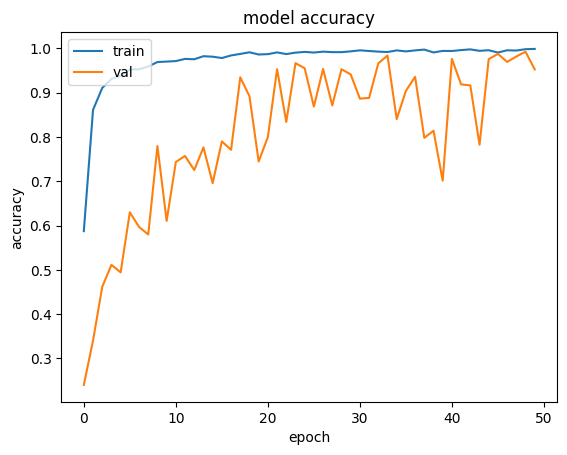

In [55]:
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

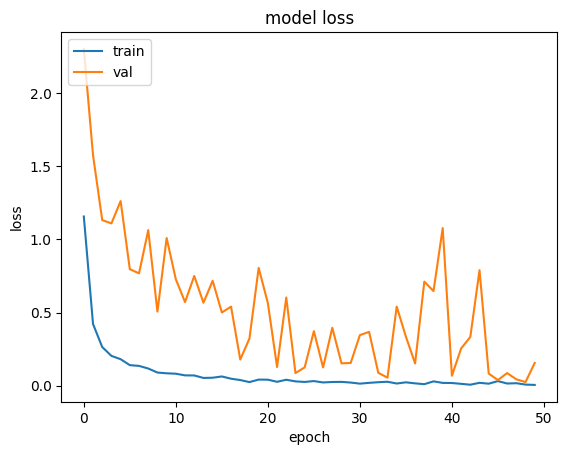

In [56]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [57]:
model.load_weights('best_model.h5')

In [58]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - 17ms/step - accuracy: 0.7299 - loss: 1.7876


In [59]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [60]:
print(conf_mat)

[[  14   17    6    1   16    1    5]
 [  12   39    6    1   25    7    9]
 [  12   10   64    2   87    3   30]
 [   2    2    1    5   11    2    4]
 [  12   12   41    4 1244    5   49]
 [   0    1    0    0    4   26    0]
 [  10    2   16    0  111    2   70]]


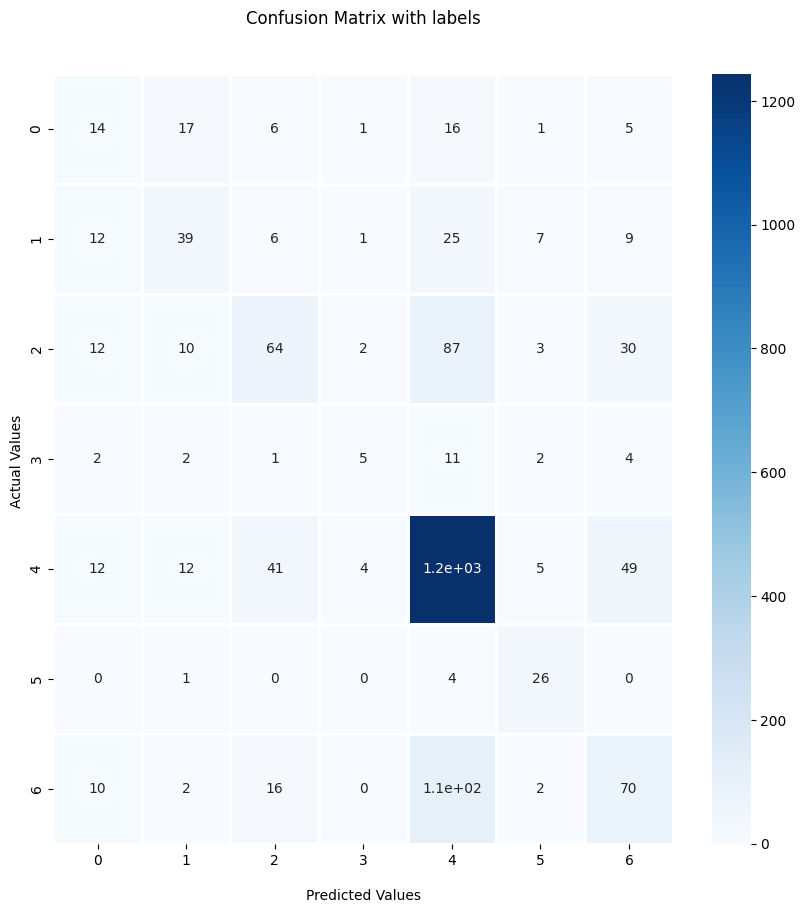

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

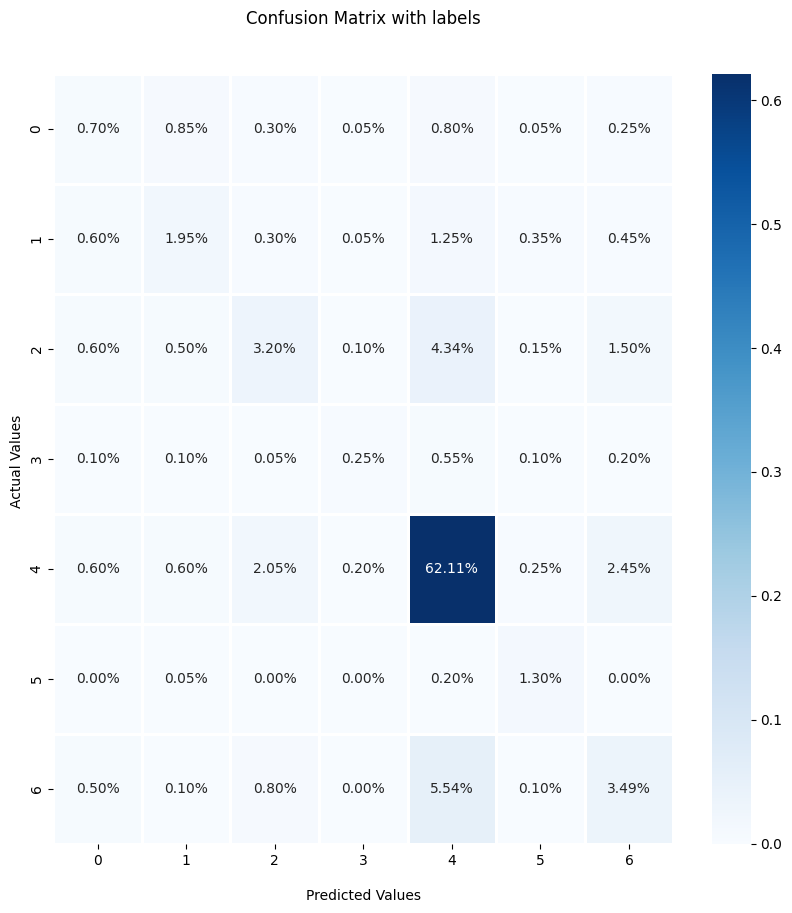

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [72]:
from PIL import Image  # Import the Image module from PIL

# Open and resize the image
image = Image.open('test.jpeg')
image = image.resize((28, 28))

# Assuming x_test is a preloaded dataset, here's how you would prepare the input image
img = np.array(image).reshape(-1, 28, 28, 3)  # Reshape to match model input dimensions

# Make the prediction
result = model.predict(img)

# Print the result
print(result[0])

# Convert result to list and find the class with the max probability
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)

# Print the predicted class
print(classes[class_ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[1.52513254e-04 6.93147490e-03 1.08859385e-04 1.62221229e-04
 9.92144525e-01 5.83731271e-05 4.41975688e-04]
('nv', 'melanocytic nevi')
